In [16]:
import numpy as np
import matplotlib.pyplot as plt
import csv


In [72]:
class Results():
    def __init__(self, path):
        self.path = '/home/arclab/sac_composition/code/log/{0}/progress.csv'.format(path)
        self.data_dict = {}
        self.set_dict()
        
    def set_dict(self):
        data_list = []
        with open(self.path, mode='r') as infile:
            reader = csv.reader(infile)
            for row in reader:
                data_list.append(row)
        num_points = len(data_list)

        for i, title in enumerate(data_list[0]):
            self.data_dict[title] = []
            for r in range(1, num_points):
                self.data_dict[title].append(data_list[r][i])  
    
    def smooth_reward_curve(self, x, y):
        
        halfwidth = int(np.ceil(len(x) / 60))  # Halfwidth of our smoothing convolution
        k = halfwidth
        xsmoo = x
        ysmoo = np.convolve(y, np.ones(2 * k + 1), mode='same') / np.convolve(np.ones_like(y), np.ones(2 * k + 1),
           mode='same')
        return xsmoo, ysmoo
    
    def graph(self):
        
        fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(13,13))
        fig.suptitle(self.path)
        epochs = [int(ep) for ep in self.data_dict['epoch']]
        
        rollout_ret = [float(loss) for loss in self.data_dict['return-min']]
        ax1.set_title('return-min')
        ax1.set_ylabel('reward')
        x, y =epochs, rollout_ret
        x, y = self.smooth_reward_curve(epochs, rollout_ret)
        ax1.plot(x, y , '-')
        
        losses = [float(loss) for loss in self.data_dict['max-path-return']]
        ax2.set_title('max-path-return')
        ax2.set_ylabel("reward")
        x, y = epochs, losses
#         x, y = self.smooth_reward_curve(epochs, losses)
        ax2.plot(x, y, 'o')
        
        losses = [float(loss) for loss in self.data_dict['vf-avg']]
        ax3.set_title('vf-avg')
        ax3.set_ylabel("value")
        ax3.plot(epochs, losses, '-')
        
        rollout_ret = [float(loss) for loss in self.data_dict['qf1-avg']]
        ax4.set_title('qf1-avg')
        ax4.set_ylabel('q value')
        ax4.plot(epochs, rollout_ret, '-')
        
        plt.show()

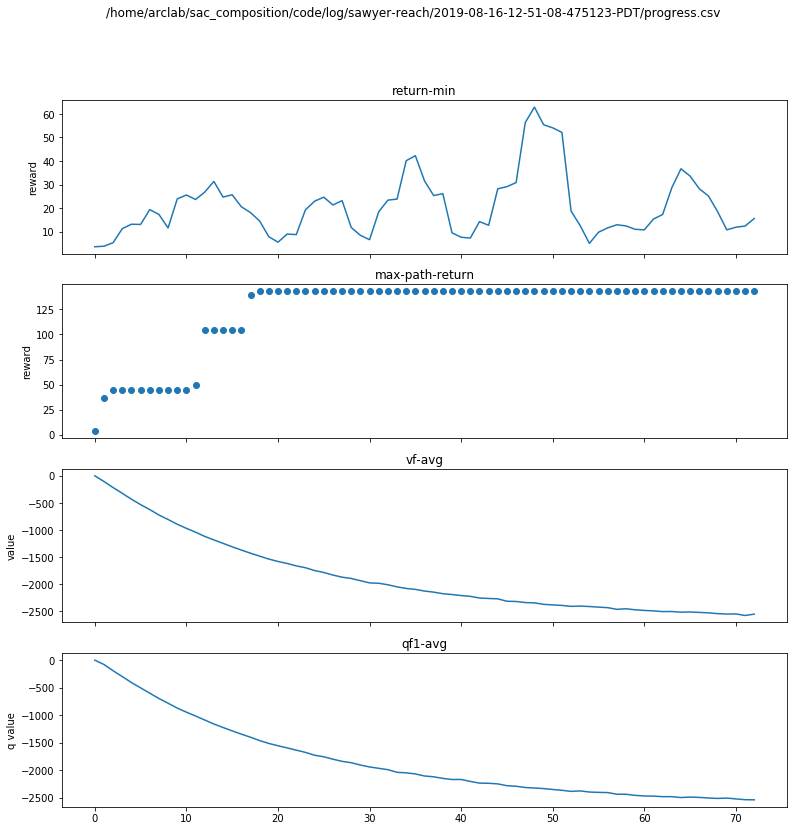

In [74]:
r = Results('sawyer-reach/2019-08-16-12-51-08-475123-PDT')
r.graph()


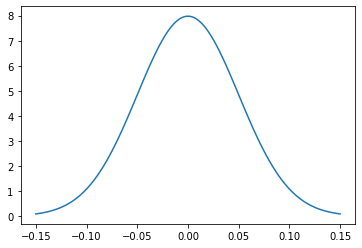

In [47]:


import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math

mu = 0.0
sigma = 0.05
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

In [42]:
math.sqrt(0.1)

0.31622776601683794